# Import dataset from Kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:05<00:00, 193MB/s]
100% 1.06G/1.06G [00:05<00:00, 205MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
!pip install keras

In [6]:
!pip install tensorflow

#Importing modules and path

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Model,Sequential
import os
from glob import glob

In [8]:
train_data_dir = '/content/test'
test_data_dir = '/content/train'
cat_images = os.listdir(os.path.join(train_data_dir, 'cats'))
dog_images = os.listdir(os.path.join(train_data_dir, 'dogs'))

In [9]:
!ls dogs_vs_cats/

test  train


In [10]:
no_of_categories = glob(train_data_dir + '/*')
print(no_of_categories)

['/content/test/dogs', '/content/test/cats']


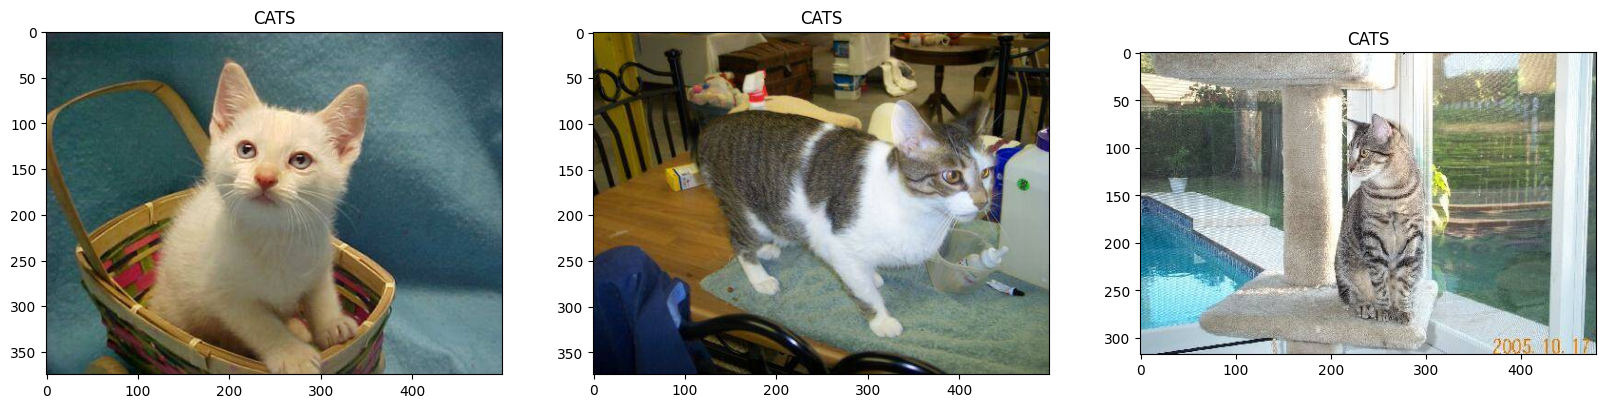

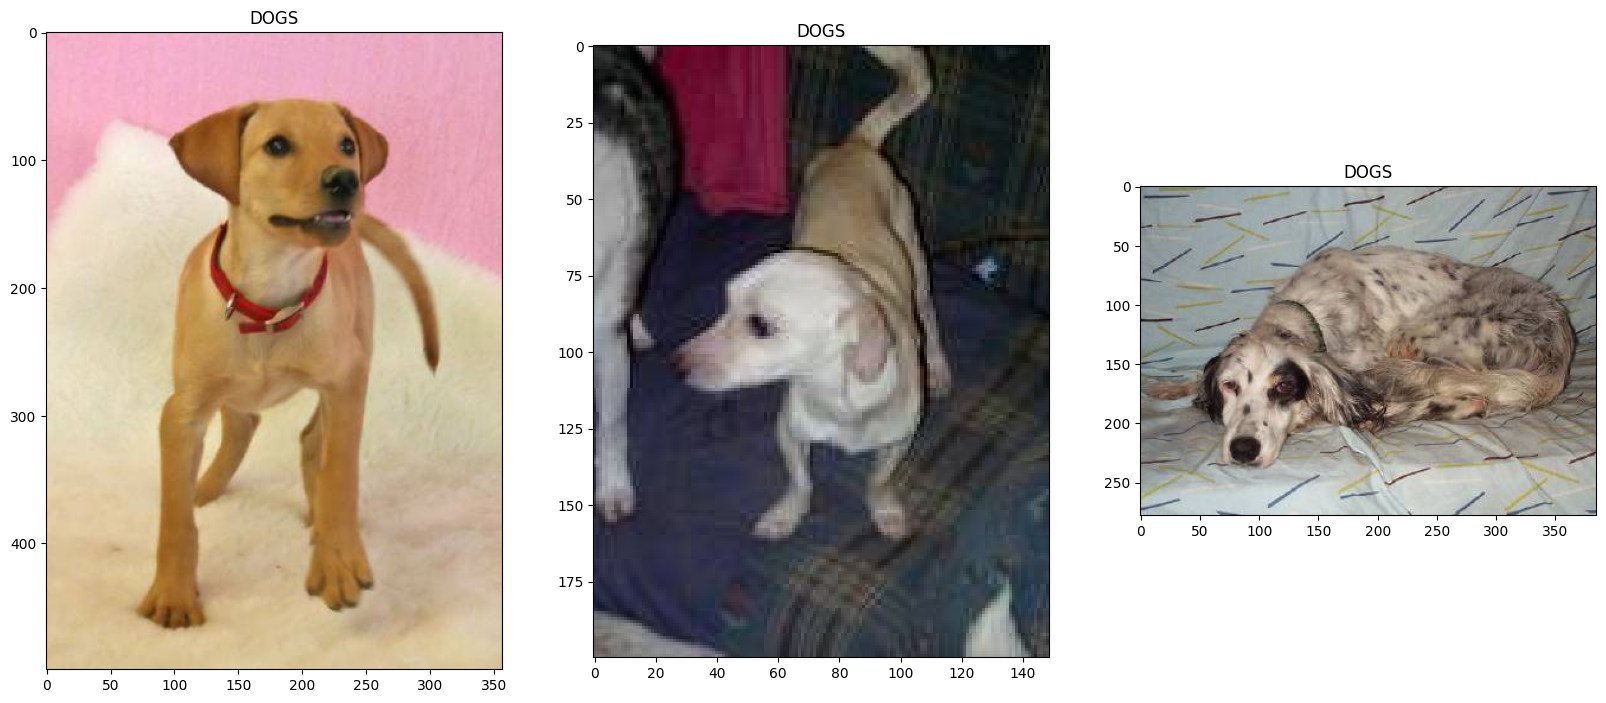

In [11]:
# Plot cat images
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(train_data_dir, 'cats', cat_images[i])))
    plt.title('CATS')
plt.show()

# Plot dog images
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(train_data_dir, 'dogs', dog_images[i])))
    plt.title('DOGS')
plt.show()


# VGG16

In [12]:
image_size=[227,227]
model=VGG16(input_shape=image_size+[3],include_top=False,weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
for layers in model.layers:
  layers.trainable=False

In [15]:
final_arc=Model(inputs=model.input,outputs=Dense(1,activation="sigmoid")(Flatten()(model.output)))

In [16]:
final_arc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
final_arc.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [18]:
train_path="/content/train"
test_path="/content/test"
train_augmen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.3,horizontal_flip=True)
test_augmen=ImageDataGenerator(rescale=1./255)

In [19]:
final_train=train_augmen.flow_from_directory(train_path,target_size=(227,227),batch_size=35,class_mode='binary')

Found 20000 images belonging to 2 classes.


In [20]:
final_test=test_augmen.flow_from_directory(test_path,target_size=(227,227),batch_size=25,class_mode='binary')

Found 5000 images belonging to 2 classes.


In [22]:
vgg16=final_arc.fit_generator(final_train,epochs=50,steps_per_epoch=20,validation_data=final_test)

<ipython-input-22-300f3590bd56>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg16=final_arc.fit_generator(final_train,epochs=50,steps_per_epoch=20,validation_data=final_test)


Epoch 1/50
20/20 [==============================] - 44s 2s/step - loss: 0.1560 - accuracy: 0.9314 - val_loss: 0.1653 - val_accuracy: 0.9312
Epoch 2/50
20/20 [==============================] - 38s 2s/step - loss: 0.1443 - accuracy: 0.9457 - val_loss: 0.1618 - val_accuracy: 0.9328
Epoch 3/50
20/20 [==============================] - 38s 2s/step - loss: 0.1590 - accuracy: 0.9300 - val_loss: 0.1694 - val_accuracy: 0.9300
Epoch 4/50
20/20 [==============================] - 38s 2s/step - loss: 0.1753 - accuracy: 0.9329 - val_loss: 0.1563 - val_accuracy: 0.9372
Epoch 5/50
20/20 [==============================] - 37s 2s/step - loss: 0.1659 - accuracy: 0.9329 - val_loss: 0.1559 - val_accuracy: 0.9364
Epoch 6/50
20/20 [==============================] - 39s 2s/step - loss: 0.1678 - accuracy: 0.9243 - val_loss: 0.1584 - val_accuracy: 0.9354
Epoch 7/50
20/20 [==============================] - 38s 2s/step - loss: 0.1501 - accuracy: 0.9429 - val_loss: 0.1625 - val_accuracy: 0.9328
Epoch 8/50
20/20 [==

In [23]:
final_arc.save('vggmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import matplotlib.pyplot as plt

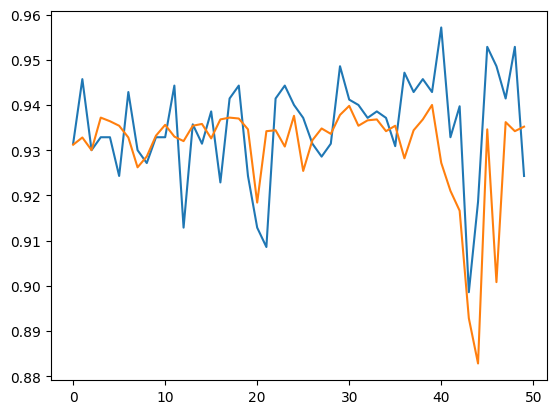

In [25]:
plt.plot(vgg16.history['accuracy'])
plt.plot(vgg16.history['val_accuracy'])
plt.show()


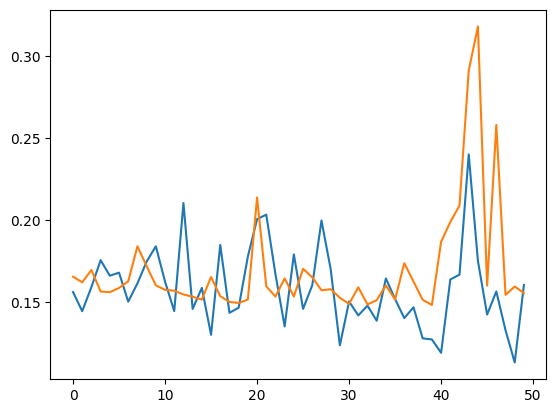

In [26]:
plt.plot(vgg16.history['loss'])
plt.plot(vgg16.history['val_loss'])
plt.show()

In [27]:
from tensorflow.keras.models import load_model
again_model=load_model('/content/vggmodel.h5')

In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/test/dogs/dog.10021.jpg',target_size=(227,227))

In [29]:
image_Array=image.img_to_array(img)
image_Array=np.expand_dims(image_Array/255,axis=0)

In [30]:
again_model.predict(image_Array)

1/1 [==============================] - 1s 1s/step


array([[0.9833123]], dtype=float32)

In [31]:
class_dict = {0:'CAT',
              1:'DOG'}

1/1 [==============================] - 0s 143ms/step


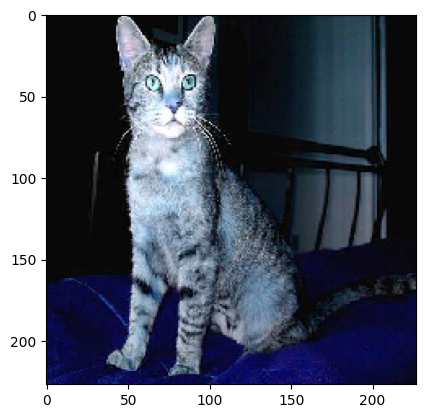

In [32]:
import cv2
import numpy as np
test_image = cv2.imread('/content/test/cats/cat.10000.jpg')
test_image = cv2.resize(test_image, (227,227),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = final_arc.predict(test_image)
pred_class = np.argmax(probs)

In [33]:
pred_class = class_dict[pred_class]

In [34]:
print('prediction: ',pred_class)

prediction:  CAT


# RESNET101

In [ ]:
image_size=[227,227]
model=ResNet101(input_shape=image_size+[3],include_top=False,weights='imagenet')

171446536/171446536 [==============================] - 8s 0us/step


In [ ]:
model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 233, 233, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 114, 114, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 114, 114, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [ ]:
for layers in model.layers:
  layers.trainable=False

In [ ]:
arc=Model(inputs=model.input,outputs=Dense(2,activation="softmax")(Flatten()(model.output)))

In [ ]:
arc.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 233, 233, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 114, 114, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 114, 114, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
train_path1="/content/train"
test_path1="/content/test"

In [ ]:
train_augmen1=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.3,horizontal_flip=True)
test_augmen1=ImageDataGenerator(rescale=1./255)

In [ ]:
final_train1=train_augmen1.flow_from_directory(train_path1,target_size=(227,227),batch_size=35,class_mode='categorical')

Found 20000 images belonging to 2 classes.


In [ ]:
final_test1=test_augmen1.flow_from_directory(test_path1,target_size=(227,227),batch_size=25,class_mode='categorical')

Found 5000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop
arc.compile(loss="categorical_crossentropy", optimizer=RMSprop(lr=0.01), metrics=['accuracy'])

In [ ]:
resnet=arc.fit_generator(final_train1,epochs=50,steps_per_epoch=20,validation_data=final_test1)

<ipython-input-22-e72db2294335>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resnet=arc.fit_generator(final_train1,epochs=50,steps_per_epoch=20,validation_data=final_test1)


Epoch 1/50
20/20 [==============================] - 61s 3s/step - loss: 20.1090 - accuracy: 0.4971 - val_loss: 21.3047 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 42s 2s/step - loss: 14.1493 - accuracy: 0.4729 - val_loss: 16.0983 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 43s 2s/step - loss: 12.0897 - accuracy: 0.5286 - val_loss: 7.7032 - val_accuracy: 0.5000
Epoch 4/50
20/20 [==============================] - 41s 2s/step - loss: 11.9858 - accuracy: 0.5171 - val_loss: 9.1900 - val_accuracy: 0.5088
Epoch 5/50
20/20 [==============================] - 42s 2s/step - loss: 11.6381 - accuracy: 0.5386 - val_loss: 8.0012 - val_accuracy: 0.5124
Epoch 6/50
20/20 [==============================] - 41s 2s/step - loss: 10.9978 - accuracy: 0.5343 - val_loss: 13.7230 - val_accuracy: 0.5028
Epoch 7/50
20/20 [==============================] - 42s 2s/step - loss: 13.4689 - accuracy: 0.4743 - val_loss: 16.9600 - val_accuracy: 0.5000
Epoch 8/5

In [ ]:
arc.save('resnetmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt

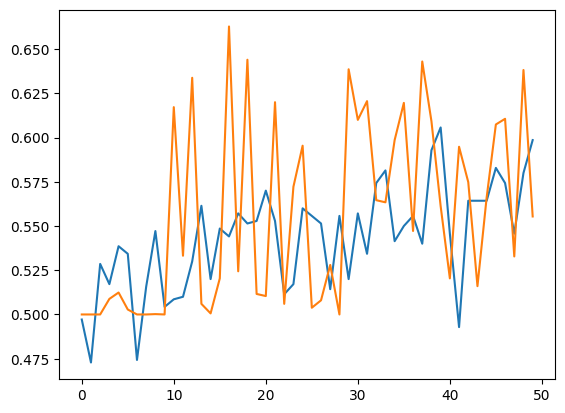

In [ ]:
plt.plot(resnet.history['accuracy'])
plt.plot(resnet.history['val_accuracy'])
plt.show()

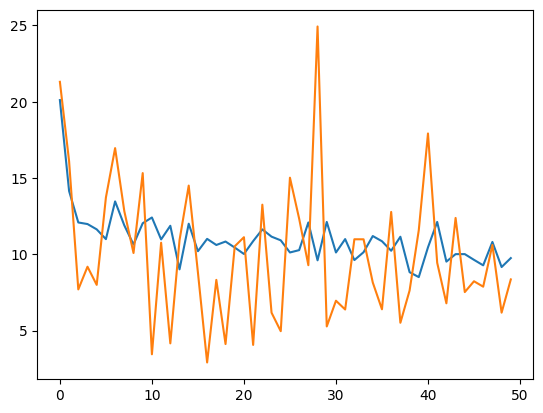

In [ ]:
plt.plot(resnet.history['loss'])
plt.plot(resnet.history['val_loss'])
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
again_model1=load_model('/content/resnetmodel.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img1=image.load_img('/content/test/dogs/dog.10014.jpg',target_size=(227,227))

In [ ]:
image_Array1=image.img_to_array(img1)
image_Array1=np.expand_dims(image_Array1/255,axis=0)

In [ ]:
again_model1.predict(image_Array1)

1/1 [==============================] - 2s 2s/step


array([[1.295859e-16, 1.000000e+00]], dtype=float32)

In [ ]:
class_dict = {0:'CAT',
              1:'DOG'}

1/1 [==============================] - 0s 27ms/step


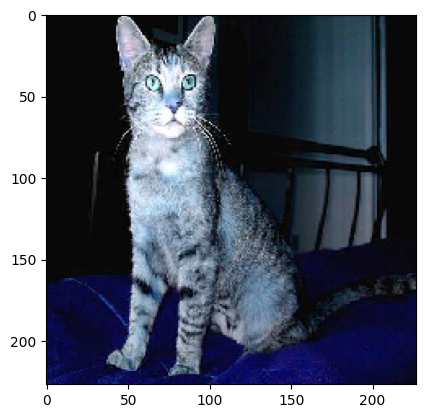

In [ ]:
import cv2
import numpy as np
test_image = cv2.imread('/content/test/cats/cat.10000.jpg')
test_image = cv2.resize(test_image, (227,227),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = arc.predict(test_image)
pred_class = np.argmax(probs)

In [ ]:
pred_class = class_dict[pred_class]
print('prediction: ',pred_class)

prediction:  CAT


1/1 [==============================] - 0s 49ms/step


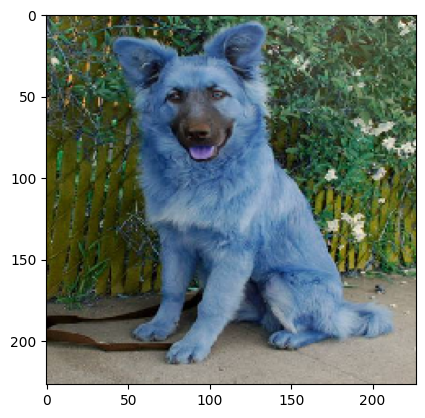

In [ ]:
import cv2
import numpy as np
test_image = cv2.imread('/content/test/dogs/dog.10014.jpg')
test_image = cv2.resize(test_image, (227,227),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = arc.predict(test_image)
pred_class = np.argmax(probs)

In [ ]:
pred_class = class_dict[pred_class]
print('prediction: ',pred_class)

prediction:  DOG


# Xception

In [ ]:
image_size=[227,227]
model=Xception(input_shape=image_size+[3],include_top=False,weights='imagenet')

83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 113, 113, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 113, 113, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 113, 113, 32)         0         ['block1_conv1_bn[0][0]

In [ ]:
for layers in model.layers:
  layers.trainable=False

In [ ]:
arc2=Model(inputs=model.input,outputs=Dense(1,activation="sigmoid")(Flatten()(model.output)))

In [ ]:
arc2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 113, 113, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 113, 113, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 113, 113, 32)         0         ['block1_conv1_bn[0][0]'] 

In [ ]:
arc2.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
train_path="/content/train"
test_path="/content/test"

In [ ]:
train_augmen2=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.3,horizontal_flip=True)
test_augmen2=ImageDataGenerator(rescale=1./255)

In [ ]:
final_train2=train_augmen2.flow_from_directory(train_path,target_size=(227,227),batch_size=35,class_mode='binary')

Found 20000 images belonging to 2 classes.


In [ ]:
final_test2=test_augmen2.flow_from_directory(test_path,target_size=(227,227),batch_size=25,class_mode='binary')

Found 5000 images belonging to 2 classes.


In [ ]:
xception=arc2.fit_generator(final_train2,epochs=50,steps_per_epoch=20,validation_data=final_test2)

<ipython-input-22-26894c957977>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  xception=arc2.fit_generator(final_train2,epochs=50,steps_per_epoch=20,validation_data=final_test2)


Epoch 1/50
20/20 [==============================] - 43s 2s/step - loss: 0.2485 - accuracy: 0.9514 - val_loss: 0.0959 - val_accuracy: 0.9834
Epoch 2/50
20/20 [==============================] - 30s 2s/step - loss: 0.3017 - accuracy: 0.9714 - val_loss: 0.2540 - val_accuracy: 0.9724
Epoch 3/50
20/20 [==============================] - 30s 2s/step - loss: 0.3163 - accuracy: 0.9571 - val_loss: 0.1238 - val_accuracy: 0.9816
Epoch 4/50
20/20 [==============================] - 30s 2s/step - loss: 0.1478 - accuracy: 0.9829 - val_loss: 0.1327 - val_accuracy: 0.9818
Epoch 5/50
20/20 [==============================] - 32s 2s/step - loss: 0.1036 - accuracy: 0.9871 - val_loss: 0.1429 - val_accuracy: 0.9834
Epoch 6/50
20/20 [==============================] - 30s 2s/step - loss: 0.2883 - accuracy: 0.9714 - val_loss: 0.1147 - val_accuracy: 0.9830
Epoch 7/50
20/20 [==============================] - 30s 2s/step - loss: 0.2557 - accuracy: 0.9757 - val_loss: 0.1640 - val_accuracy: 0.9778
Epoch 8/50
20/20 [==

In [ ]:
arc2.save('xception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt

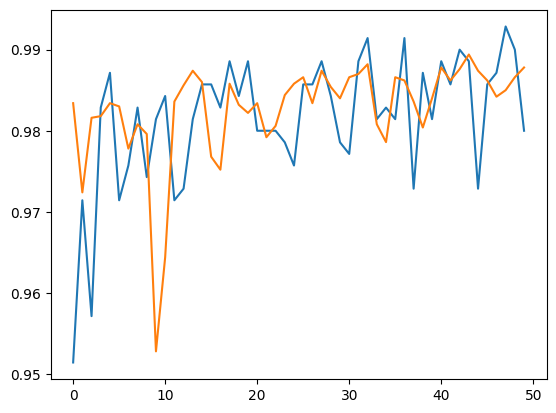

In [ ]:
plt.plot(xception.history['accuracy'])
plt.plot(xception.history['val_accuracy'])
plt.show()

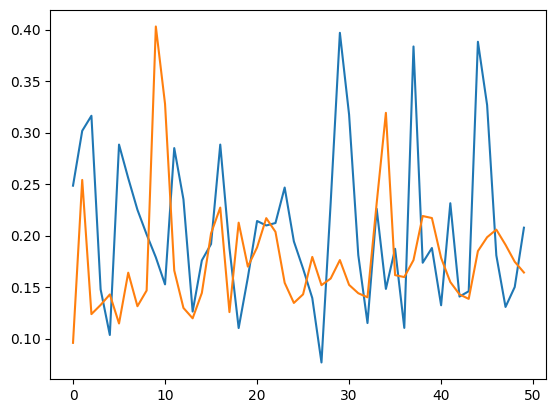

In [ ]:
plt.plot(xception.history['loss'])
plt.plot(xception.history['val_loss'])
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
again_model2=load_model('/content/xception.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img2=image.load_img('/content/test/cats/cat.10026.jpg',target_size=(227,227))

In [ ]:
image_Array2=image.img_to_array(img2)
image_Array2=np.expand_dims(image_Array2/255,axis=0)

In [ ]:
again_model2.predict(image_Array2)

1/1 [==============================] - 2s 2s/step


array([[0.]], dtype=float32)

In [ ]:
class_dict = {0:'CAT',
              1:'DOG'}

1/1 [==============================] - 1s 789ms/step


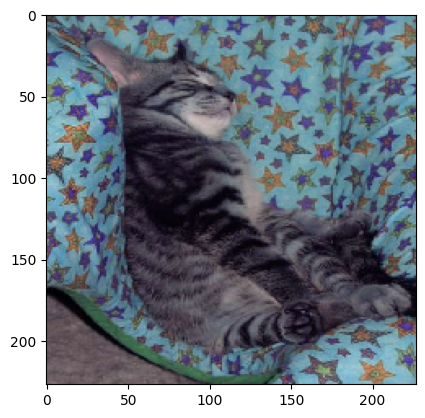

In [ ]:
import cv2
import numpy as np
test_image = cv2.imread('/content/test/cats/cat.10026.jpg')
test_image = cv2.resize(test_image, (227,227),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = arc2.predict(test_image)
pred_class = np.argmax(probs)

In [ ]:
pred_class = class_dict[pred_class]

In [ ]:
print('prediction: ',pred_class)

prediction:  CAT


# MOBILENET

In [ ]:
from tensorflow.keras.applications import MobileNet

In [ ]:
image_size=[227,227]
model=MobileNet(input_shape=image_size+[3],include_top=False,weights='imagenet')

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 114, 114, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 114, 114, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 114, 114, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 114, 114, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 114, 114, 32

In [ ]:
for layers in model.layers:
  layers.trainable=False

In [ ]:
arc3=Model(inputs=model.input,outputs=Dense(1,activation="sigmoid")(Flatten()(model.output)))

In [ ]:
arc3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 114, 114, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 114, 114, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 114, 114, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 114, 114, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 114, 114, 32)      128   

In [ ]:
arc3.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
train_path="/content/train"
test_path="/content/test"

In [ ]:
train_augmen3=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.3,horizontal_flip=True)
test_augmen3=ImageDataGenerator(rescale=1./255)

In [ ]:
final_train3=train_augmen3.flow_from_directory(train_path,target_size=(227,227),batch_size=35,class_mode='binary')

Found 20000 images belonging to 2 classes.


In [ ]:
final_test3=test_augmen3.flow_from_directory(test_path,target_size=(227,227),batch_size=25,class_mode='binary')

Found 5000 images belonging to 2 classes.


In [ ]:
mobilenet=arc3.fit_generator(final_train3,epochs=50,steps_per_epoch=20,validation_data=final_test3)

<ipython-input-23-cae561e40065>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mobilenet=arc3.fit_generator(final_train3,epochs=50,steps_per_epoch=20,validation_data=final_test3)


Epoch 1/50
20/20 [==============================] - 34s 1s/step - loss: 0.3001 - accuracy: 0.9200 - val_loss: 0.4437 - val_accuracy: 0.9362
Epoch 2/50
20/20 [==============================] - 28s 1s/step - loss: 0.1509 - accuracy: 0.9657 - val_loss: 0.1545 - val_accuracy: 0.9758
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.2342 - accuracy: 0.9629 - val_loss: 0.1701 - val_accuracy: 0.9714
Epoch 4/50
20/20 [==============================] - 29s 2s/step - loss: 0.1938 - accuracy: 0.9743 - val_loss: 0.1375 - val_accuracy: 0.9750
Epoch 5/50
20/20 [==============================] - 21s 1s/step - loss: 0.1533 - accuracy: 0.9786 - val_loss: 0.1536 - val_accuracy: 0.9734
Epoch 6/50
20/20 [==============================] - 21s 1s/step - loss: 0.2512 - accuracy: 0.9643 - val_loss: 0.2067 - val_accuracy: 0.9750
Epoch 7/50
20/20 [==============================] - 21s 1s/step - loss: 0.4435 - accuracy: 0.9586 - val_loss: 0.2837 - val_accuracy: 0.9692
Epoch 8/50
20/20 [==

In [ ]:
arc3.save('mobilenetmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt

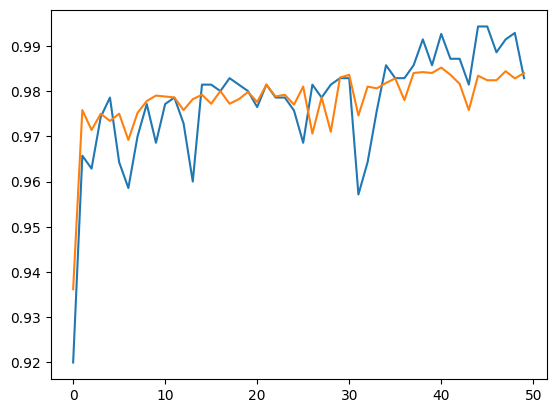

In [ ]:
plt.plot(mobilenet.history['accuracy'])
plt.plot(mobilenet.history['val_accuracy'])
plt.show()

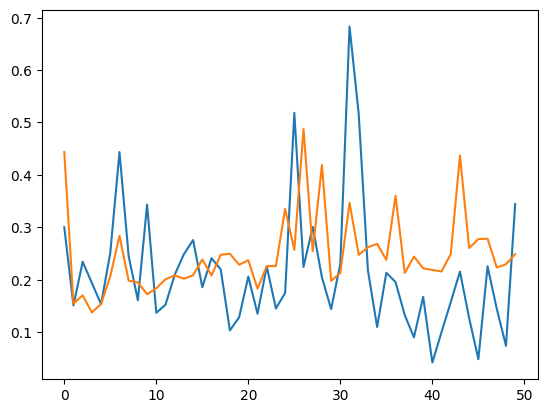

In [ ]:
plt.plot(mobilenet.history['loss'])
plt.plot(mobilenet.history['val_loss'])
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
again_model=load_model('/content/mobilenetmodel.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img3=image.load_img('/content/test/dogs/dog.1002.jpg',target_size=(227,227))

In [ ]:
image_Array3=image.img_to_array(img3)
image_Array3=np.expand_dims(image_Array3/255,axis=0)

In [ ]:
again_model.predict(image_Array3)

1/1 [==============================] - 1s 922ms/step


array([[1.]], dtype=float32)

In [ ]:
class_dict = {0:'CAT',
              1:'DOG'}

1/1 [==============================] - 1s 613ms/step


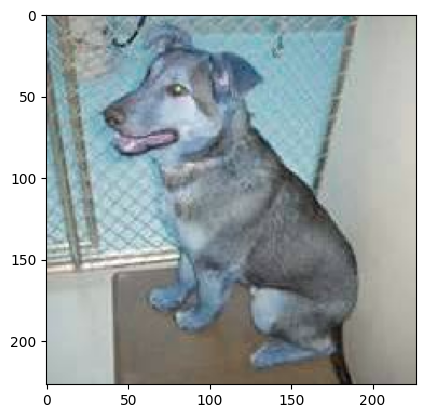

In [ ]:
import cv2
import numpy as np
test_image = cv2.imread('/content/test/dogs/dog.1002.jpg')
test_image = cv2.resize(test_image, (227,227),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = arc3.predict(test_image)
pred_class = np.argmax(probs)

In [ ]:
pred_class = class_dict[pred_class]

In [ ]:
print('prediction: ',pred_class)

prediction:  CAT


# EfficientNetB3

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

In [ ]:
#sizeof image
image_size=[227,227]
#creating object of oour model,set image(227*227*3),(removing input,hidden,output)
model=EfficientNetB3(input_shape=image_size+[3],include_top=False,weights='imagenet')

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 227, 227, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 227, 227, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 227, 227, 3)          0         ['normalization[0

In [ ]:
for layers in model.layers:
  layers.trainable=False

In [ ]:
arc4=Model(inputs=model.input,outputs=Dense(1,activation="sigmoid")(Flatten()(model.output)))

In [ ]:
arc4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 227, 227, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 227, 227, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 227, 227, 3)          0         ['normalization[0][0]']   

In [ ]:
arc4.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
train_path="/content/train"
test_path="/content/test"

In [ ]:
train_augmen4=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.3,horizontal_flip=True)
test_augmen4=ImageDataGenerator(rescale=1./255)

In [ ]:
final_train4=train_augmen4.flow_from_directory(train_path,target_size=(227,227),batch_size=35,class_mode='binary')

Found 20000 images belonging to 2 classes.


In [ ]:
final_test4=test_augmen4.flow_from_directory(test_path,target_size=(227,227),batch_size=25,class_mode='binary')

Found 5000 images belonging to 2 classes.


In [ ]:
efficientnet=arc4.fit_generator(final_train4,epochs=50,steps_per_epoch=20,validation_data=final_test4)

<ipython-input-26-1e0fc5ef41dc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  efficientnet=arc4.fit_generator(final_train4,epochs=50,steps_per_epoch=20,validation_data=final_test4)


Epoch 1/50
20/20 [==============================] - 38s 2s/step - loss: 0.7314 - accuracy: 0.5871 - val_loss: 0.9561 - val_accuracy: 0.5316
Epoch 2/50
20/20 [==============================] - 30s 2s/step - loss: 1.1372 - accuracy: 0.5271 - val_loss: 0.7424 - val_accuracy: 0.5516
Epoch 3/50
20/20 [==============================] - 29s 2s/step - loss: 1.0998 - accuracy: 0.5071 - val_loss: 0.7780 - val_accuracy: 0.5716
Epoch 4/50
20/20 [==============================] - 31s 2s/step - loss: 1.1560 - accuracy: 0.5486 - val_loss: 0.6953 - val_accuracy: 0.6024
Epoch 5/50
20/20 [==============================] - 30s 2s/step - loss: 0.8028 - accuracy: 0.5750 - val_loss: 0.6922 - val_accuracy: 0.5920
Epoch 6/50
20/20 [==============================] - 30s 2s/step - loss: 1.0321 - accuracy: 0.5300 - val_loss: 1.4907 - val_accuracy: 0.5000
Epoch 7/50
20/20 [==============================] - 30s 2s/step - loss: 1.3811 - accuracy: 0.4971 - val_loss: 0.7079 - val_accuracy: 0.6026
Epoch 8/50
20/20 [==

In [ ]:
arc4.save('Efficientnetmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


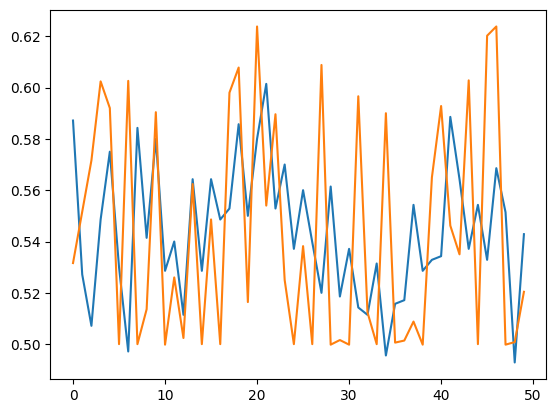

In [ ]:
plt.plot(efficientnet.history['accuracy'])
plt.plot(efficientnet.history['val_accuracy'])
plt.show()


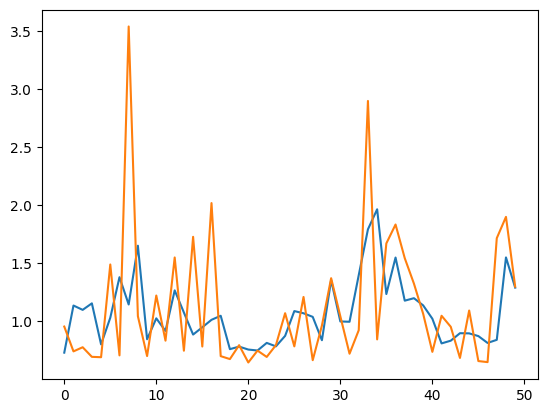

In [ ]:
plt.plot(efficientnet.history['loss'])
plt.plot(efficientnet.history['val_loss'])
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
again_model5=load_model('Efficientnetmodel.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img5=image.load_img('/content/test/cats/cat.10046.jpg',target_size=(227,227))

In [ ]:
image_Array5=image.img_to_array(img5)
image_Array5=np.expand_dims(image_Array5/255,axis=0)


In [ ]:
again_model5.predict(image_Array5)

1/1 [==============================] - 4s 4s/step


array([[0.04559052]], dtype=float32)

In [ ]:
again_model5=load_model('/content/Efficientnetmodel.h5')

In [ ]:
class_dict = {0:'CAT',
              1:'DOG'}

1/1 [==============================] - 2s 2s/step


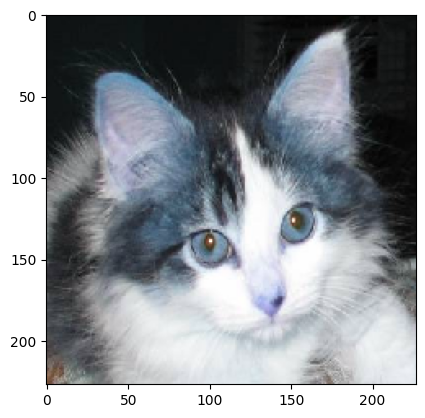

In [ ]:
import cv2
import numpy as np
test_image = cv2.imread('/content/test/cats/cat.10046.jpg')
test_image = cv2.resize(test_image, (227,227),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = arc4.predict(test_image)
pred_class = np.argmax(probs)

In [ ]:
pred_class = class_dict[pred_class]

In [ ]:
print('prediction: ',pred_class)

prediction:  CAT


# Performance

VGG16

In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

import datetime
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , SeparableConv2D, MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras import optimizers
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix, f1_score, accuracy_score
import tensorflow as tf


In [36]:
final_test.class_indices

{'cats': 0, 'dogs': 1}

In [37]:
a=final_arc.evaluate_generator(final_test)

<ipython-input-37-74a478a15e0c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  a=final_arc.evaluate_generator(final_test)


In [38]:
print(f'Testing loss: {a[0]}')
print(f'Testing accuracy: {a[1]}')

Testing loss: 0.15531021356582642
Testing accuracy: 0.9351999759674072


In [39]:
model = load_model("vggmodel.h5")

In [40]:
test_data_dir = "/content/test"
cats_test_data_dir = os.path.join(test_data_dir, "cats")
dogs_test_data_dir = os.path.join(test_data_dir, "dogs")

In [41]:
a_predictions = []

for img_dir in [cats_test_data_dir, dogs_test_data_dir]:
    for img in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img)
        img = load_img(img_path, target_size=(227, 227))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        result = model.predict(img / 255.0)[0]
        a_predictions.append(np.argmax(result))

a_predictions = np.array(a_predictions)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 24ms/step


In [42]:
print(classification_report(final_test.classes,a_predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2500
           1       0.00      0.00      0.00      2500

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(confusion_matrix(final_test.classes,a_predictions))

[[2500    0]
 [2500    0]]


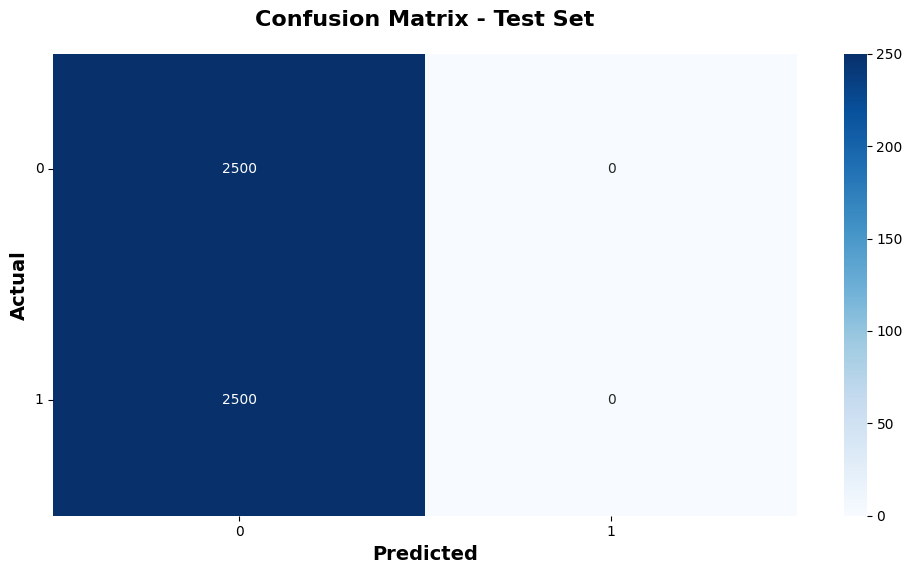

In [44]:
import seaborn as sns


plt.figure(figsize=(12, 6))
ax = sns.heatmap(confusion_matrix(final_test.classes,a_predictions), annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

RESNET

In [ ]:
final_test1.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
b=arc.evaluate_generator(final_test1)

<ipython-input-48-76a919355561>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  b=arc.evaluate_generator(final_test1)


In [ ]:
print(f'Testing loss: {b[0]}')
print(f'Testing accuracy: {b[1]}')

Testing loss: 8.357857704162598
Testing accuracy: 0.555400013923645


In [ ]:
model = load_model("resnetmodel.h5")

In [ ]:
test_data_dir = "/content/test"
cats_test_data_dir = os.path.join(test_data_dir, "cats")
dogs_test_data_dir = os.path.join(test_data_dir, "dogs")

In [ ]:
b_predictions = []

for img_dir in [cats_test_data_dir, dogs_test_data_dir]:
    for img in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img)
        img = load_img(img_path, target_size=(227, 227))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        result = model.predict(img / 255.0)[0]
        b_predictions.append(np.argmax(result))


1/1 [==============================] - 0s 32ms/step


In [ ]:
b_predictions = np.array(b_predictions)

In [ ]:
print(classification_report(final_test1.classes,b_predictions))

              precision    recall  f1-score   support

           0       0.84      0.14      0.23      2500
           1       0.53      0.97      0.69      2500

    accuracy                           0.56      5000
   macro avg       0.69      0.56      0.46      5000
weighted avg       0.69      0.56      0.46      5000



In [ ]:
print(confusion_matrix(final_test1.classes,b_predictions))

[[ 341 2159]
 [  64 2436]]


In [ ]:
import seaborn as sns

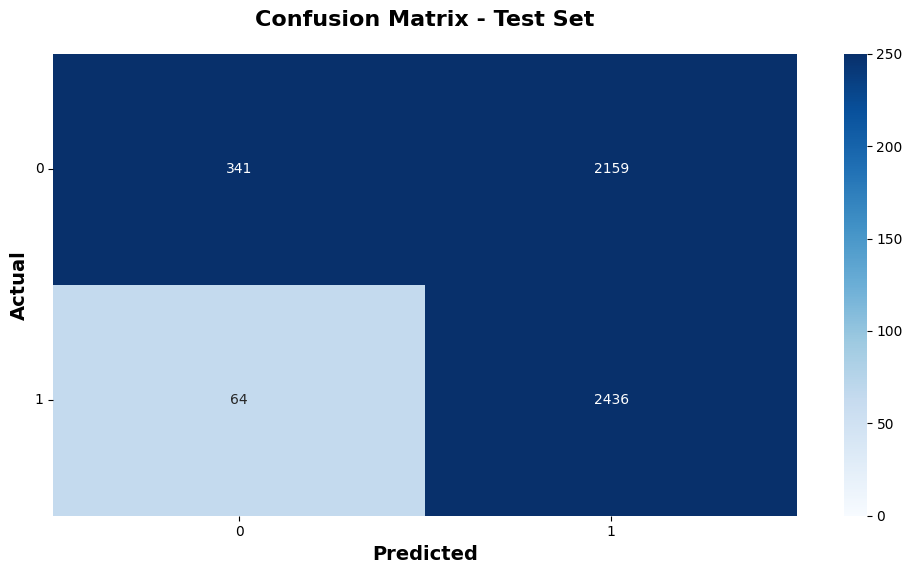

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(confusion_matrix(final_test1.classes,b_predictions), annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

Xception

In [ ]:
final_test2.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
c=arc2.evaluate_generator(final_test2)

<ipython-input-36-15bb0edfca2c>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  c=arc2.evaluate_generator(final_test2)


In [ ]:
print(f'Testing loss: {c[0]}')
print(f'Testing accuracy: {c[1]}')

Testing loss: 0.16419492661952972
Testing accuracy: 0.9878000020980835


In [ ]:
model = load_model("xception.h5")

In [ ]:
test_data_dir = "/content/test"
cats_test_data_dir = os.path.join(test_data_dir, "cats")
dogs_test_data_dir = os.path.join(test_data_dir, "dogs")

In [ ]:
c_predictions = []

for img_dir in [cats_test_data_dir, dogs_test_data_dir]:
    for img in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img)
        img = load_img(img_path, target_size=(227, 227))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        result = model.predict(img / 255.0)[0]
        c_predictions.append(np.argmax(result))

c_predictions = np.array(c_predictions)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step


In [ ]:
print(classification_report(final_test2.classes,c_predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2500
           1       0.00      0.00      0.00      2500

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


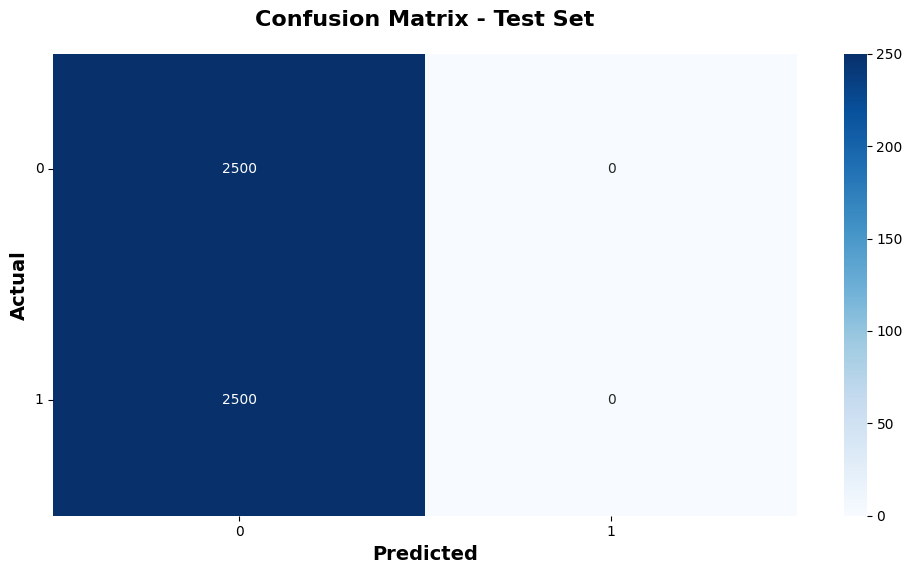

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.heatmap(confusion_matrix(final_test2.classes,c_predictions), annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);


MOBILENET

In [ ]:
final_test3.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
d=arc3.evaluate_generator(final_test3)

<ipython-input-49-d10c68dd87c2>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  d=arc3.evaluate_generator(final_test3)


In [ ]:
print(f'Testing loss: {d[0]}')
print(f'Testing accuracy: {d[1]}')

Testing loss: 0.24884630739688873
Testing accuracy: 0.984000027179718


In [ ]:
model = load_model("mobilenetmodel.h5")

In [ ]:
test_data_dir = "/content/test"
cats_test_data_dir = os.path.join(test_data_dir, "cats")
dogs_test_data_dir = os.path.join(test_data_dir, "dogs")

In [ ]:
d_predictions = []

for img_dir in [cats_test_data_dir, dogs_test_data_dir]:
    for img in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img)
        img = load_img(img_path, target_size=(227, 227))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        result = model.predict(img / 255.0)[0]
        c_predictions.append(np.argmax(result))

d_predictions = np.array(d_predictions)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 35ms/step


In [ ]:
print(classification_report(final_test3.classes,d_predictions))

ValueError: Found input variables with inconsistent numbers of samples: [5000, 0]

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.heatmap(confusion_matrix(final_test.classes,a_predictions), annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

EfficientNetB3

In [ ]:
final_test4.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
e=arc4.evaluate_generator(final_test4)

<ipython-input-47-142f345ac944>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  e=arc4.evaluate_generator(final_test4)


In [ ]:
print(f'Testing loss: {e[0]}')
print(f'Testing accuracy: {e[1]}')

Testing loss: 1.2996227741241455
Testing accuracy: 0.5203999876976013


In [ ]:
model = load_model("Efficientnetmodel.h5")

In [ ]:
test_data_dir = "/content/test"
cats_test_data_dir = os.path.join(test_data_dir, "cats")
dogs_test_data_dir = os.path.join(test_data_dir, "dogs")

In [ ]:
e_predictions = []

for img_dir in [cats_test_data_dir, dogs_test_data_dir]:
    for img in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img)
        img = load_img(img_path, target_size=(227, 227))
        img = img_to_array(img)
        img = np.expand_dims(img, axis=0)
        result = model.predict(img / 255.0)[0]
        e_predictions.append(np.argmax(result))

e_predictions = np.array(e_predictions)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 35ms/step


In [ ]:
print(classification_report(final_test4.classes,e_predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2500
           1       0.00      0.00      0.00      2500

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


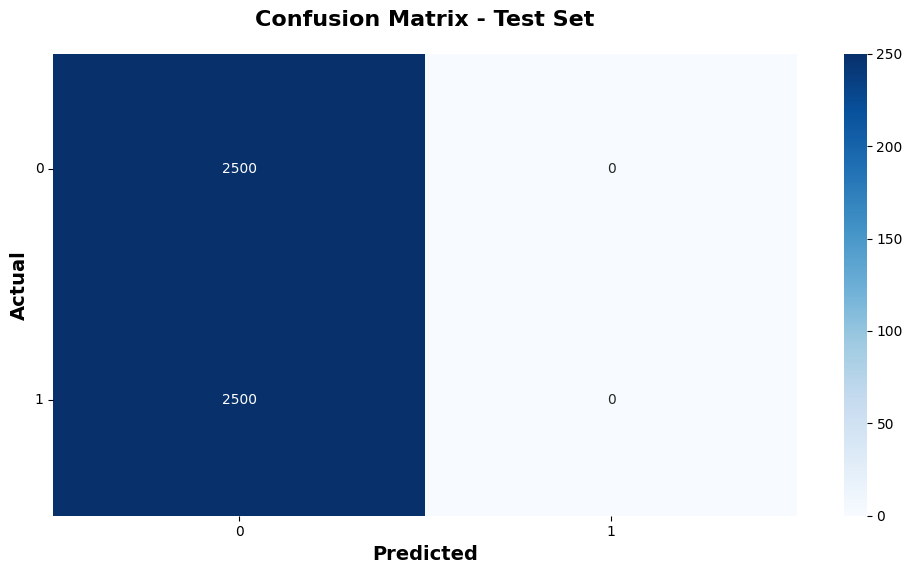

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
ax = sns.heatmap(confusion_matrix(final_test4.classes,e_predictions), annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);